## Module 3 Clustering Exercises

Market segmentation is a strategy that divides a broad target market of customers into smaller, more similar groups, and then designs a marketing strategy specifically for each group. Clustering is a common technique for market segmentation since it automatically finds similar groups given a data set.

In this notebook, we'll see how clustering can be used to find similar groups of customers who belong to an airline's frequent flyer program. The airline is trying to learn more about its customers so that it can target different customer segments with different types of mileage offers.

We will be focusing on Hierarchical clustering to find clusters of data. Most of the exercises are similar to what we have in labs and practices while some of them might be a bit challenging. Explore the web to find the commands needed to perform few exercises. Exercises uses the file AirlinesCluster.csv that contains information on 3,999 members of the frequent flyer program. The data comes from the textbook "Data Mining for Business Intelligence," by Galit Shmueli, Nitin R. Patel, and Peter C. Bruce.

There are seven different variables in the dataset, as described below:

- Balance = number of miles eligible for award travel
- QualMiles = number of miles qualifying for TopFlight status
- BonusMiles = number of miles earned from non-flight bonus transactions in the past 12 months
- BonusTrans = number of non-flight bonus transactions in the past 12 months
- FlightMiles = number of flight miles in the past 12 months
- FlightTrans = number of flight transactions in the past 12 months
- DaysSinceEnroll = number of days since enrolled in the frequent flyer program

In [1]:
import numpy as np
import pandas as pd
from sklearn import cluster
from matplotlib import pyplot
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as hca
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from pylab import *

%matplotlib inline

In [2]:
airlines_data = pd.read_csv("/dsa/data/DSA-8630/AirlinesCluster.csv")
airlines_data[:4]
airlines_data.BonusMiles = pd.to_numeric(airlines_data.BonusMiles)
airlines_data.BonusTrans = pd.to_numeric(airlines_data.BonusTrans)
type(airlines_data.BonusMiles)
type(airlines_data.BonusTrans)

pandas.core.series.Series

In [3]:
airlines_data.shape

(3999, 7)

#### Normalize the data

Why is it important to normalize the data before clustering?

- If we don't normalize the data, the variables that are on a larger scale will contribute much more to the distance calculation, and thus will dominate the clustering.


**Activity 1: ** Create a normalized data frame called "airlinesNorm" using StandardScaler() function

In [4]:
# Your code for activity 1 goes here...

stscaler = StandardScaler().fit(airlines_data)
airlinesNorm = stscaler.transform(airlines_data)
airlinesNorm[:4,]

array([[-0.45114078, -0.18629869, -0.70278627, -1.10406452, -0.32860326,
        -0.36216787,  1.39545434],
       [-0.53945687, -0.18629869, -0.7010884 , -0.99992616, -0.32860326,
        -0.36216787,  1.37995704],
       [-0.32003123, -0.18629869, -0.5392527 , -0.79164945, -0.32860326,
        -0.36216787,  1.41192021],
       [-0.58379852, -0.18629869, -0.68928615, -1.10406452, -0.32860326,
        -0.36216787,  1.37220839]])

**Activity 2: ** Compute the distances between data points (using euclidean distance) and then run the Hierarchical clustering algorithm (using method="ward") on the normalized data

In [5]:
# Your code for activity 2 goes here...

link_matrix=hca.linkage(airlinesNorm,metric="euclidean",method="ward")

**Activity 3: ** Plot the dendogram

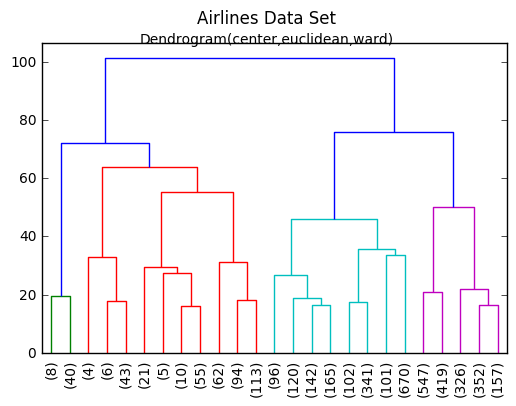

In [6]:
# Your code for activity 3 goes here...
plt=hca.dendrogram(link_matrix,truncate_mode="lastp",p=25)
xticks(rotation=90)
ylabel=("Distance")
figtext(0.5,0.95,"Airlines Data Set",ha="center",fontsize=12)
figtext(0.5,0.90,"Dendrogram(center,euclidean,ward)",ha="center",fontsize=10)


### knowing K (number of clusters)

**Activity 4: ** Plot the same dendogram again but draw a line on the dendogram to show 5 clusters are formed when performing a cut on dendogram as shown below

**Hint: ** Use fig, axes = pyplot.subplots(1, 1, figsize=(10, 10)) to create figure and use axes object to plot a horizontal line
<img src="../Images/dendogram.PNG">

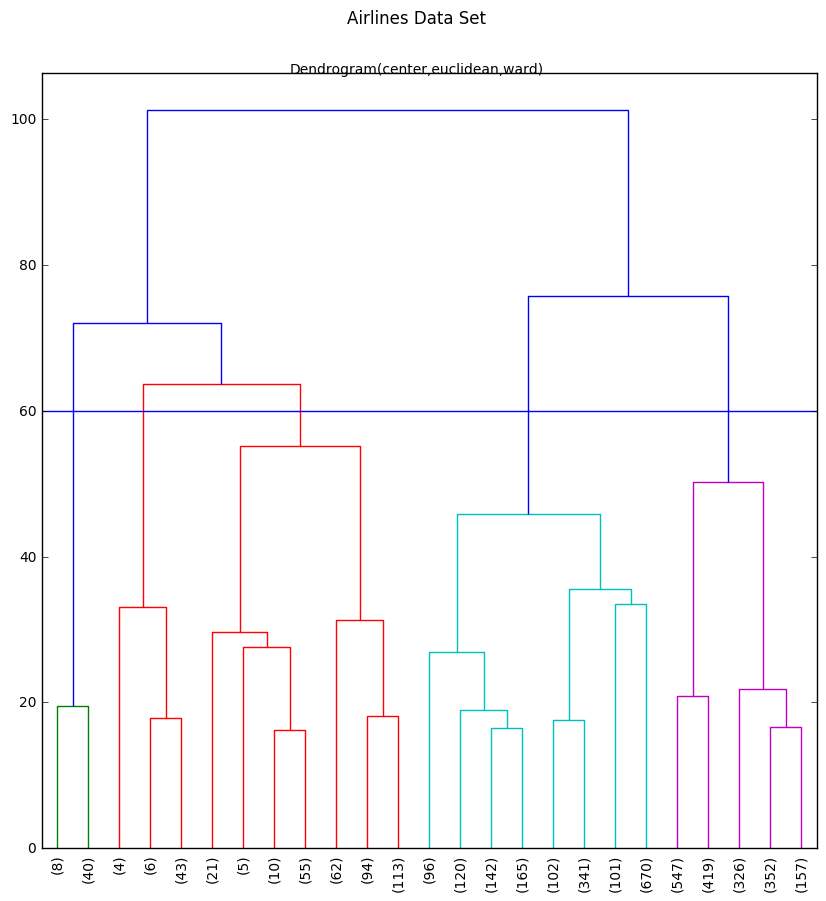

In [7]:
# Your code for activity 4 goes here...
fig, axes = pyplot.subplots(1, 1, figsize=(10, 10))
plt=hca.dendrogram(link_matrix,truncate_mode="lastp",p=25)
xticks(rotation=90)
ylabel=("Distance")
figtext(0.5,0.95,"Airlines Data Set",ha="center",fontsize=12)
figtext(0.5,0.90,"Dendrogram(center,euclidean,ward)",ha="center",fontsize=10)
axes.axhline(y=60)


**Activity 5: ** Print the number of samples in each of the 5 clusters

In [8]:
# Your code for activity 5 goes here...

from scipy.cluster.hierarchy import fcluster
max_d=60
clusters=fcluster(link_matrix, max_d, criterion="distance")
unique, counts = np.unique(clusters, return_counts=True)
counts

array([  48,   53,  360, 1737, 1801])

**Activity 6: ** Plot the variables BonusMiles on X-axis and BonusTrans on Y-axis with clusters as color reference. use the parameter cmap='prism' to display the colors better.

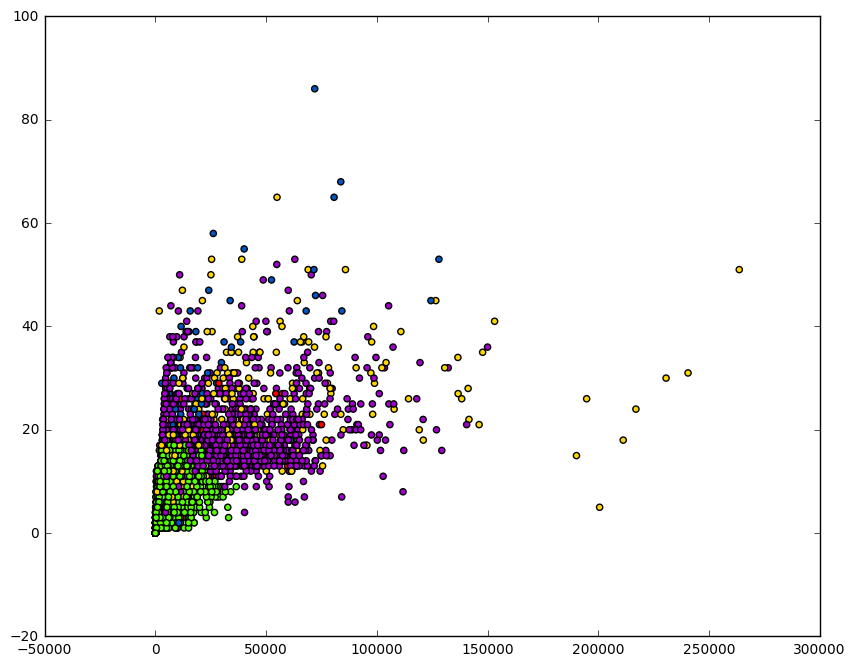

In [11]:
# Your code for activity 6 goes here...
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.scatter(airlines_data.BonusMiles, airlines_data.BonusTrans, c=clusters, cmap='prism')  # plot points with cluster dependent colors
plt.show()

**Activity 7: ** Create a new column called cluster in airlines_data dataframe using clusters that are generated in activity 5. Group the data according to cluster column and store the result in a variable called grouped. 

In [12]:
# Your code for activity 7 goes here...
airlines_data["Cluster"]=clusters
grouped=round(airlines_data.groupby(['Cluster']).sum())
grouped.head()

,Balance,QualMiles,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll
Cluster,,,,,,,
1,6495265,281763,787488,607,46789,157,207378
2,8206022,26008,1703262,1774,463889,1255,214482
3,73553842,52096,13055408,7129,823219,2428,1707897
4,138803693,214858,46438967,29238,258244,840,8211612
5,67272887,1589,6577115,7648,247622,813,6128750


In [14]:
airlines_data["Cluster"]=clusters
grouped=round(airlines_data.groupby(['Cluster']).size())
grouped.head()

Cluster
1      48
2      53
3     360
4    1737
5    1801
dtype: int64

**Activity 8: ** Split the airlines data into 5 new dataframes according to the clusters each row is assigned to.

In [15]:
# Your code for activity 8 goes here...

cluster1 = grouped.iloc[:1,]
cluster2 = grouped.iloc[1:2,]
cluster3 = grouped.iloc[2:3,]
cluster4 = grouped.iloc[3:4,]
cluster5 = grouped.iloc[4:5,]


Creating a list below with the five new clusters formed. 

In [16]:
clt = [cluster1, cluster2, cluster3, cluster4, cluster5]


**Activity 9: ** Compare the mean values in each of the variables for the 5 clusters. You may want to compute the average values of the unnormalized data(airlines_data) so that it is easier to interpret.

**Sample output: **

dimensions of cluster:  (48, 8)

Balance:  135318

QualMiles:  5870

BonusMiles:  16406

BonusTrans:  13

FlightMiles:  975

FlightTrans:  3

DaysSinceEnroll:  4320

cluster:  1

In [17]:
# Supress scientific notation. Output numbers look neat without 10 digit long precision values
np.set_printoptions(suppress=True)

# Your code for activity 9 goes here...
grouped=round(airlines_data.groupby(['Cluster']).mean())
grouped.head()


,Balance,QualMiles,BonusMiles,BonusTrans,FlightMiles,FlightTrans,DaysSinceEnroll
Cluster,,,,,,,
1,135318.0,5870.0,16406.0,13.0,975.0,3.0,4320.0
2,154831.0,491.0,32137.0,33.0,8753.0,24.0,4047.0
3,204316.0,145.0,36265.0,20.0,2287.0,7.0,4744.0
4,79910.0,124.0,26735.0,17.0,149.0,0.0,4727.0
5,37353.0,1.0,3652.0,4.0,137.0,0.0,3403.0


**Activity 10: ** Write your conclusions based on the average values for each variable in each cluster. 

If we look at the balance column across clusters we can easily see that the means are pretty distant from each other by some substantial valuesand it is the same for the rest of the columns suggesting that the clustering algorithm has done a pretty good job differentiating between data points.For the Days since enrolled columns it is not that obvious because we can see that there is a small difference in the means between clusters.